# Lead Score - Case Study

## Problem Statement
An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%. <br>
## Goals and Objectives
There are quite a few goals for this case study.
- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

In [1]:
# Importing all necessary libraries
import pandas as pd
import numpy as np
import warnings 
import datetime
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

## 1.Importing the data

In [2]:
# Loading the data 
df = pd.read_csv('Leads.csv')

###  Inspect the dataframe
This helps to give a good idea of the dataframes.

In [3]:
# Reading the data
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# Shape of the dataset
df.shape

(9240, 37)

The dataset is having 9240 rows and 37 columns

In [5]:
# Info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

As we can see from the above, there are 7 numerical variables columns and remaining 30 columns are having categorical variables.

###  Cleaning the dataframe

Now, there are some columns/categorical variables having label as 'Select' which means the customer was not selected any option hence it is better to put it as null value - Because there was no suitable option present to select for the customer searching for. 

In [6]:
# Replacing 'Select' label with nan values
df.replace('Select',np.NaN,inplace = True)

In [7]:
# Selecting the columns with more than 40% null values:
null_values = df.isnull().sum()/len(df) *100
null_values_40 = null_values[null_values > 40]
null_values_40

How did you hear about X Education    78.463203
Lead Quality                          51.590909
Lead Profile                          74.188312
Asymmetrique Activity Index           45.649351
Asymmetrique Profile Index            45.649351
Asymmetrique Activity Score           45.649351
Asymmetrique Profile Score            45.649351
dtype: float64

In [8]:
# Dropping the columns with more than 40% null values:
df.drop(null_values_40.index,axis = 1,inplace = True)

In [9]:
# Printing the unique variables in each column:
for cols in df.columns:
      print(cols,':',df[cols].nunique())

Prospect ID : 9240
Lead Number : 9240
Lead Origin : 5
Lead Source : 21
Do Not Email : 2
Do Not Call : 2
Converted : 2
TotalVisits : 41
Total Time Spent on Website : 1731
Page Views Per Visit : 114
Last Activity : 17
Country : 38
Specialization : 18
What is your current occupation : 6
What matters most to you in choosing a course : 3
Search : 2
Magazine : 1
Newspaper Article : 2
X Education Forums : 2
Newspaper : 2
Digital Advertisement : 2
Through Recommendations : 2
Receive More Updates About Our Courses : 1
Tags : 26
Update me on Supply Chain Content : 1
Get updates on DM Content : 1
City : 6
I agree to pay the amount through cheque : 1
A free copy of Mastering The Interview : 2
Last Notable Activity : 16


There are some columns which contains only one variable and will not contribute to the predicting power of our models.

In [10]:
# Dropping columns which contains only one variable:
for i in df.columns:
      if df[i].nunique()==1:
        df.drop(i,axis = 1,inplace = True)

Now we have some sales genrated data in our dataset which are not required, so we will drop them also.

In [11]:
# Selecting the sales data in the column sales_data 
sales_data  = ['Tags','Last Notable Activity','Last Activity','Prospect ID','Lead Number']

In [12]:
# Deleting sales data from our dataset
df.drop(sales_data,axis =1, inplace= True)

In [13]:
# Selecting all the categorical columns:
categorical = df.select_dtypes(include='object')

In [14]:
# Pritning unique values of each categorical columns:
for i in df.columns:
      print(df[i].nunique(),':',i)

5 : Lead Origin
21 : Lead Source
2 : Do Not Email
2 : Do Not Call
2 : Converted
41 : TotalVisits
1731 : Total Time Spent on Website
114 : Page Views Per Visit
38 : Country
18 : Specialization
6 : What is your current occupation
3 : What matters most to you in choosing a course
2 : Search
2 : Newspaper Article
2 : X Education Forums
2 : Newspaper
2 : Digital Advertisement
2 : Through Recommendations
6 : City
2 : A free copy of Mastering The Interview


Printing the unique value and their percentage in each column:

In [15]:
df['Do Not Call'].value_counts()/len(categorical)

No     0.999784
Yes    0.000216
Name: Do Not Call, dtype: float64

In [16]:
df['Search'].value_counts()/len(categorical)

No     0.998485
Yes    0.001515
Name: Search, dtype: float64

In [17]:
df['Newspaper Article'].value_counts()/len(categorical)

No     0.999784
Yes    0.000216
Name: Newspaper Article, dtype: float64

In [18]:
df['X Education Forums'].value_counts()/len(categorical)

No     0.999892
Yes    0.000108
Name: X Education Forums, dtype: float64

In [19]:
df['Newspaper'].value_counts()/len(categorical)

No     0.999892
Yes    0.000108
Name: Newspaper, dtype: float64

In [20]:
df['Through Recommendations'].value_counts()/len(categorical)

No     0.999242
Yes    0.000758
Name: Through Recommendations, dtype: float64

In [21]:
df['Digital Advertisement'].value_counts()/len(categorical)

No     0.999567
Yes    0.000433
Name: Digital Advertisement, dtype: float64

In [22]:
df['Country'].value_counts()/len(categorical)

India                   0.702597
United States           0.007468
United Arab Emirates    0.005736
Singapore               0.002597
Saudi Arabia            0.002273
United Kingdom          0.001623
Australia               0.001407
Qatar                   0.001082
Bahrain                 0.000758
Hong Kong               0.000758
France                  0.000649
Oman                    0.000649
unknown                 0.000541
South Africa            0.000433
Nigeria                 0.000433
Germany                 0.000433
Canada                  0.000433
Kuwait                  0.000433
Sweden                  0.000325
Ghana                   0.000216
Asia/Pacific Region     0.000216
Italy                   0.000216
Belgium                 0.000216
Netherlands             0.000216
Uganda                  0.000216
Philippines             0.000216
Bangladesh              0.000216
China                   0.000216
Sri Lanka               0.000108
Liberia                 0.000108
Denmark   

In [23]:
df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

There are some columns which are having higher frequency for a single variable (<i>greater than 99%</i>) which will not help our model.Thus needs to be deleted.
The columns are -:


*   'Do Not Call'

*   'Search'

*   'Newspaper Article'

*   'X Education Forums'


*   'Newspaper'


*   'Through Recommendations'


*   'Digital Advertisement


*   'What matters most to you in choosing a course'

*   'Country'








In [24]:
# Removing the columns with higher frequency for single variable:
removable = ['Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Through Recommendations',
             'Digital Advertisement','What matters most to you in choosing a course','Country']
df = df.drop(removable,axis = 1)

In [25]:
df.isnull().sum()/len(df) *100

Lead Origin                                0.000000
Lead Source                                0.389610
Do Not Email                               0.000000
Converted                                  0.000000
TotalVisits                                1.482684
Total Time Spent on Website                0.000000
Page Views Per Visit                       1.482684
Specialization                            36.580087
What is your current occupation           29.112554
City                                      39.707792
A free copy of Mastering The Interview     0.000000
dtype: float64

There are 3 categorical columns : 'Specialization','What is your current occupation' and 'City'
where there are a lot of missing data and we will replace them with mode.

In [26]:
missing_vals = ['Specialization','What is your current occupation','City']

In [27]:
for cols in missing_vals:
      df[cols].fillna(df[cols].mode()[0],inplace = True)

In [28]:
# Rechecking the null values:
round(100*(df.isnull().sum()/df.shape[0] ),2)

Lead Origin                               0.00
Lead Source                               0.39
Do Not Email                              0.00
Converted                                 0.00
TotalVisits                               1.48
Total Time Spent on Website               0.00
Page Views Per Visit                      1.48
Specialization                            0.00
What is your current occupation           0.00
City                                      0.00
A free copy of Mastering The Interview    0.00
dtype: float64

As for the remaining null values we will again impute them with their mode as mean value may biased due to presence of outliers in the column.

In [29]:
# Imputing null values with their mode.
df['TotalVisits'].fillna(df['TotalVisits'].mode()[0],inplace = True)
df['Page Views Per Visit'].fillna(df['Page Views Per Visit'].mode()[0],inplace = True)
df['Lead Source'].fillna(df['Lead Source'].mode()[0],inplace = True)

There are some categorical columns with 2 variables "Yes" and "No"  we will replace them with 1 and 0 for better intuition.

In [30]:
for cols in df.columns:
    if df[cols].nunique()==2:
        if cols == 'Converted':
              continue
    else:
          df[cols] = df[cols].map({'Yes':1,'No':0}) 

In [31]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,City,A free copy of Mastering The Interview
0,NaN,NaN,No,0,NaN,NaN,NaN,NaN,NaN,NaN,No
1,NaN,NaN,No,0,NaN,NaN,NaN,NaN,NaN,NaN,No
2,NaN,NaN,No,1,NaN,NaN,NaN,NaN,NaN,NaN,Yes
3,NaN,NaN,No,0,NaN,NaN,NaN,NaN,NaN,NaN,No
4,NaN,NaN,No,1,NaN,NaN,NaN,NaN,NaN,NaN,No


In [32]:
df.shape

(9240, 11)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             0 non-null      float64
 1   Lead Source                             0 non-null      float64
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             0 non-null      float64
 5   Total Time Spent on Website             0 non-null      float64
 6   Page Views Per Visit                    0 non-null      float64
 7   Specialization                          0 non-null      float64
 8   What is your current occupation         0 non-null      float64
 9   City                                    0 non-null      float64
 10  A free copy of Mastering The Interview  9240 non-null   obje

## 2.EDA

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
correlation  = df.corr()

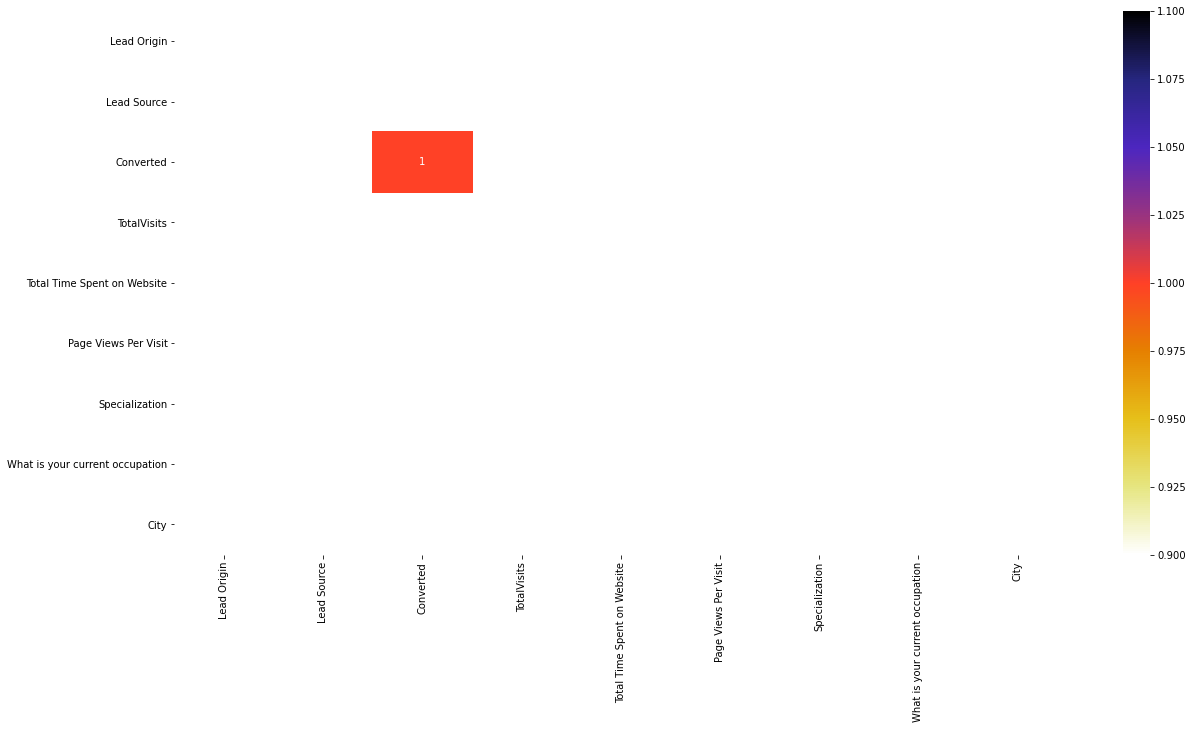

In [36]:
plt.figure(figsize  = (20,10))
sns.heatmap(correlation,annot = True, cmap = 'CMRmap_r')
plt.show()

## Outlier check

In [37]:
round(df.describe(percentiles=[0.15,0.35,0.55,0.75,0.95]),2)

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,City
count,0.0,0.0,9240.00,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,0.39,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.49,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN
15%,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN
35%,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN
55%,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN
95%,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN


As we can see there are outliers in 2 variables 'TotalVisits' and 'Page Views Per Visit'.

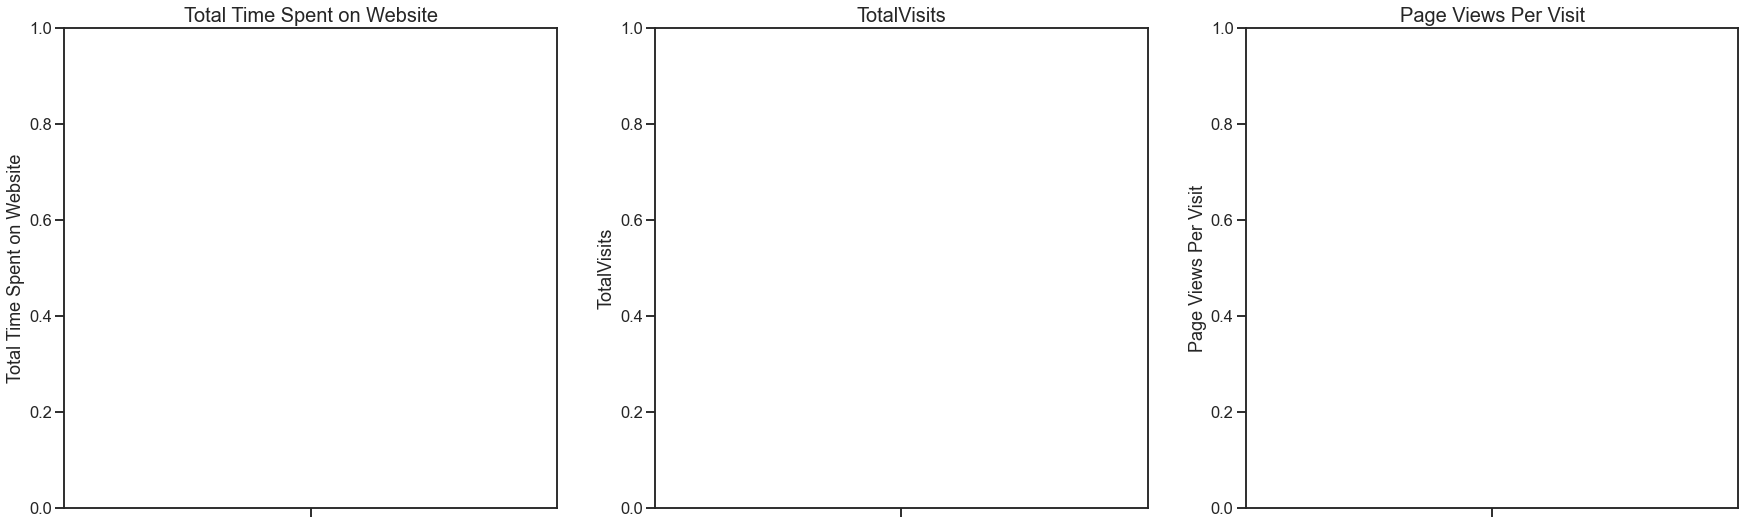

In [38]:
# Setting size of figure, context and gridlines
plt.figure(figsize=(30,30))
plt.tight_layout()
sns.set_style('ticks')
sns.set_context('talk')

# Title names for the columns in the dataset
col={0:'Total Time Spent on Website', 1:'TotalVisits', 2:'Page Views Per Visit'}

# Visualising the outliers with boxplot for all the variables 
for i in range(3):
    plt.subplot(3,3,i+1)
    plt.title(col[i],fontsize=20)
    sns.boxplot(y=df[col[i]], data=df, palette='Set1', fliersize=12)

### Univariate Analysis

In [39]:
# Visualise specialization column
plt.figure(figsize=(15,8))
sns.countplot(df["Specialization"])
plt.xticks(rotation = 90)

ValueError: min() arg is an empty sequence

<Figure size 1080x576 with 0 Axes>

<b>Inference</b>:  

          1. "Finance Management" is mostly choosen by the people.
          2. There are equal number of the people opted for HR Management and Marketing Management.

In [ ]:
# visualise Lead Origin column
plt.figure(figsize=(15,5))
sns.countplot(x = "Lead Origin", hue = "Converted", data = df)
plt.legend(loc="upper right")
plt.show()

<b>Inference</b>:

            1. API and Landing Page Submission have 30-35% conversion rate but count of lead originated from them are       
               considerable.
            2. Lead Add Form has more than 90% conversion rate but count of lead are not very high.
            3. Lead Import are very less in count.


In [ ]:
# visualise Lead Source column
fig, axs = plt.subplots(figsize = (20,7))
sns.countplot(x = "Lead Source", hue = "Converted", data = df)
plt.xticks(rotation = 90)

<b>Inference</b>:

          1. Google and Direct traffic generates maximum number of leads.
          2. Conversion Rate of reference leads and leads through welingak website is high.

In [ ]:
# Visualise the time spent on website using seaborn-boxplot.
plt.figure(figsize=(6,5))
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = df)
plt.show()

<b>Inference:</b>

          Leads spending more time on the website are more likely to be converted.

In [ ]:
# Visualise the data on number of views over a page
plt.figure(figsize=(8,6))
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = df)
plt.ylim(0, 25)
plt.show()

<b>Inference:</b>
    
    Median value for converted and unconverted leads is same.

###Dummy variables creation

In [ ]:
df.info()

In [ ]:
# Selecting all the categoriacal columns:
categorical_cols = df.select_dtypes(include = 'object')
categorical_cols.shape

In [ ]:
# Creating dummy variables:
dummy =  pd.get_dummies(categorical_cols,drop_first= True)
dummy.shape

In [ ]:
# Dropping the original columns and merging the dummy variables:
df.drop(categorical_cols.columns,axis = 1,inplace = True)
df = pd.concat((df,dummy),axis = 1)


In [ ]:
# Checking the dataframe
df.head()

In [ ]:
df.shape

### Splitting the dataset into test and train

In [ ]:
x = df.drop('Converted',axis =1)
y  = df['Converted']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8,random_state = 11)

### Rescaling the train features:

In [ ]:
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler
# Scale the three numeric features
scaler = MinMaxScaler()
x_train[['TotalVisits','Page Views Per Visit','Total Time Spent on Website']] = scaler.fit_transform(x_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
x_train.head()

##   4.Model building

### Using RFE

Since there are a lot of features we will select only the top 15 using RFE and do manual tuning 

In [ ]:
# Since the total number of variables are a lot, using RFE to calculate the best 15 variables to be used for model building
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
lr = LogisticRegression()
rfe = RFE(lr,15)
rfe = rfe.fit(x_train,y_train)
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

In [ ]:
# Selecting columns only which are 'True' in rfem.support_ i.e True columns were selected for creating a model
cols = x_train.columns[rfe.support_]
x_train = x_train[cols]

###VIF

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Defining a function to calculate the VIF:

    
def VIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

### First model

In [ ]:
#  Training the model
import statsmodels.api as sm

x_train_sm  =  sm.add_constant(x_train)
log_1 = sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())
model_1 = log_1.fit()
print(model_1.summary())

In [ ]:
# Calculating the VIF
VIF(x_train)

### Second model

 Dropping the column 'What is your current occupation_Unemployed' as it has high p value.

In [ ]:
# Dropping the column 'What is your current occupation_Unemployed'
cols = cols.drop('What is your current occupation_Unemployed')
x_train = x_train[cols]

In [ ]:
# Training the second model
x_train_sm  =  sm.add_constant(x_train)
log_2 = sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())
model_2 = log_2.fit()
print(model_2.summary())

Calculating the VIF

In [ ]:
# Calculating the VIF
VIF(x_train)

### Third Model

 Dropping the column 'Lead Source_google' as it has high p value.

In [ ]:
# Dropping the column 'Lead Source_google'
cols = cols.drop('Lead Source_google')
x_train = x_train[cols]

In [ ]:
# Training the second model
x_train_sm  =  sm.add_constant(x_train)
log_3 = sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())
model_3 = log_3.fit()
print(model_3.summary())

In [ ]:
# Calculating the VIF
VIF(x_train)

### Fourth Model

 Dropping the column 'What is your current occupation_Housewife' as it has high p value.

In [ ]:
# Dropping the column 'What is your current occupation_Housewife'
cols = cols.drop('What is your current occupation_Housewife')
x_train = x_train[cols]

In [ ]:
# Training the model
x_train_sm  =  sm.add_constant(x_train)
log_4 = sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())
model_4 = log_4.fit()
print(model_4.summary())

In [ ]:
# Calculating the VIF
VIF(x_train)

### Fifth model

In [ ]:
# Dropping the column 'What is your current occupation_Other'
cols = cols.drop('What is your current occupation_Other')
x_train = x_train[cols]

In [ ]:
# Training the model
x_train_sm  =  sm.add_constant(x_train)
log_5 = sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())
model_5 = log_5.fit()
print(model_5.summary())

In [ ]:
# Calculating the VIF
VIF(x_train)

### Sixth model

In [ ]:
# Dropping the column 'What is your current occupation_Student'
cols = cols.drop('What is your current occupation_Student')
x_train = x_train[cols]

In [ ]:
# Training the model
x_train_sm  =  sm.add_constant(x_train)
log_6 = sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())
model_6 = log_6.fit()
print(model_6.summary())

In [ ]:
# Calculating the VIF
VIF(x_train)

### Seventh model

In [ ]:
# Dropping the column 'Specialization_Rural and Agribusiness'
cols = cols.drop('Specialization_Retail Management')
x_train = x_train[cols]

In [ ]:
# Training the model
x_train_sm  =  sm.add_constant(x_train)
log_7 = sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())
model_7 = log_7.fit()
print(model_7.summary())

In [ ]:
# Calculating the VIF
VIF(x_train)

We can select this model as the variables are significant and has low VIF.

## 5.Creating a prediction on train set

In [ ]:
# Predicting the train dataset with our final model
y_train_pred = model_7.predict(x_train_sm)

# Reshaping to an array
y_train_pred =  y_train_pred.values.reshape(-1)

In [ ]:
# Creating a new dataset and saving predicted values in it

y_train_pred_final = pd.DataFrame({'churn':y_train,
                                   'churn_proba': y_train_pred})
y_train_pred_final.head()

In [ ]:
# Substituting 0 or 1 with the cut off as 0.5 in the varaible 'predicted' for the values of predicted probablility.
y_train_pred_final['predicted'] = y_train_pred_final['churn_proba'].map(lambda x: 1 if x>0.5 else 0)
y_train_pred_final.head()

### Model evaluation

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

In [ ]:
# Looking at the confusion matrix for the train set.
confusion = confusion_matrix(y_train_pred_final.churn,y_train_pred_final.predicted)
print(confusion)

In [ ]:
# Looking at the accuracy score for the train dataset
score = accuracy_score(y_train_pred_final.churn,y_train_pred_final.predicted)
score

With the current cut off as 0.5 we have an accuracy around 79%.

In [ ]:
tp = confusion[1][1]  # true positives
tn = confusion[0][0] # true negatives
fp = confusion[0][1]  # false positives
fn = confusion[1][0]  # false negatives

In [ ]:
# Checking sensitivity and specificity of the train dataset.
sensi  = tp/(tp+fn)
print('Sensitivity',":",round(sensi,2))
speci = tn/(tn+fp)
print('Specificity',":",round(speci,2))

Looking at the sensitivity and specificity we can say that we need to set a different cutoff for the probability

### ROC curve

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
# Plotting the curve
draw_roc(y_train_pred_final.churn, y_train_pred_final.churn_proba)

In [ ]:
# Checking the roc score
roc_score = roc_auc_score(y_train_pred_final['churn'],y_train_pred_final['churn_proba'])
roc_score

The area under ROC curve is 0.84 which is a very good value.

Even though we selected the cutoff at random the roc score is pretty good.

We can plot the sensitivity VS specificity graph to check the optimum cutoff value.

### Sensitivity Vs specificity graph

In [ ]:
'''Creating a dataframe to see the values of accuracy, sensitivity, and 
   specificity at different values of probabiity cutoffs'''
cuttoff_df = pd.DataFrame(columns=['prob','accuracy','sensi','speci'])

# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
  y_train_pred_final[i] = y_train_pred_final.churn_proba.map(lambda x : 1 if x >i else  0 )
  con = confusion_matrix(y_train_pred_final.churn,y_train_pred_final[i])
  tn  = con[0][0]
  fp = con[0][1]
  tp = con[1][1]
  fn = con[1][0]
  prob = i
  accuracy =round((tp+tn)/(tp+tn+fp+fn),2)
  sensi = round((tp /(tp+fn)),2)
  speci = round((tn / (tn+fp)),2)
  cuttoff_df.loc[i] =[i,accuracy,sensi,speci] 

  

cuttoff_df.head()

In [ ]:
# Plotting it
cuttoff_df.plot.line(x = 'prob' ,y= ['accuracy','sensi','speci'])
plt.show()

### Precision vs Recall graph

In [ ]:
# Precision vs recall graph
p,r,thresh = precision_recall_curve(y_train_pred_final.churn,y_train_pred_final.churn_proba)
plt.plot(thresh,p[:-1],'g-')
plt.plot(thresh,r[:-1],'r-')
plt.show()

### Tuning the model

From the graph it is visible that the optimal cut off is at 0.25

In [ ]:
y_train_pred_final['predicted'] = y_train_pred_final['churn_proba'].map(lambda x: 1 if x>0.25 else 0)

In [ ]:
# Looking at the confusion matrix for the train set.
confusion = confusion_matrix(y_train_pred_final.churn,y_train_pred_final.predicted)
print(confusion)

In [ ]:
# Looking at the accuracy score for the train dataset
score = accuracy_score(y_train_pred_final.churn,y_train_pred_final.predicted)
score

We have an accuracy of 0.78 on the train set which is good.

In [ ]:
tp = confusion[1][1]  # true positives
tn = confusion[0][0] # true negatives
fp = confusion[0][1]  # false positives
fn = confusion[1][0]  # false negatives

In [ ]:
# Checking sensitivity and specificity of the train dataset.
sensi  = tp/(tp+fn)
print('Sensitivity',":",round(sensi,2))
speci = tn/(tn+fp)
print('Specificity',":",round(speci,2))

Here on the train set we have Sensitivity of .78 while the Specificity is 0.78 which is good.

##  6.Creating prediction on the test set

### Scaling the test dataset

In [ ]:
x_test[['TotalVisits','Page Views Per Visit',
        'Total Time Spent on Website']] = scaler.fit_transform(x_test[['TotalVisits', 'Page Views Per Visit',
                                                                       'Total Time Spent on Website']])

In [ ]:
x_test  = x_test[cols]

### Making predictions

In [ ]:
x_test_sm = sm.add_constant(x_test)
y_test_pred = model_7.predict(x_test_sm)

### Model evaluation

In [ ]:
# Creating a dataframe
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.rename(columns= {0:'churn_proba'},inplace= True)
y_pred_1['churn'] = y_test
# Predicting the outcomes with probability cutoff as 0.25 by creating new columns in the final test dataset
y_pred_1['predicted'] = y_pred_1['churn_proba'].map(lambda x:1 if x>0.25 else 0)
y_pred_1.head()

In [ ]:
# Looking at the confusion matrix for the test set.
confusion = confusion_matrix(y_pred_1['churn'],y_pred_1['predicted'])
print(confusion)

In [ ]:
# Looking at the accuracy score for the train dataset
score = accuracy_score(y_pred_1['churn'],y_pred_1['predicted'])
score

Here on the test set we have an accuracy of .78 which is good.

In [ ]:
tp = confusion[1][1]  # true positives
tn = confusion[0][0]  # true negatives
fp = confusion[0][1]  # false positives
fn = confusion[1][0]  # false negatives

In [ ]:
# Checking sensitivity and specificity of the test dataset.
sensi  = tp/(tp+fn)
print('Sensitivity',":",round(sensi,2))
speci = tn/(tn+fp)
print('Specificity',":",round(speci,2))

Here we have a Sensitivity of .78 and Specificity of .79 on the test set.

### ROC curve

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
# Plotting the curve
draw_roc(y_pred_1['churn'],y_pred_1['churn_proba'])

In [ ]:
# Checking the roc score
roc_score = roc_auc_score(y_pred_1['churn'],y_pred_1['churn_proba'])
roc_score

Here we a roc socre of .84 which is good.

### Sensitivity Vs specificity graph

In [ ]:
'''Creating a dataframe to see the values of accuracy, sensitivity, and specificity 
    at different values of probabiity cutoffs'''
cuttoff_df = pd.DataFrame(columns=['prob','accuracy','sensi','speci'])

# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    y_pred_1[i] =y_pred_1['churn_proba'].map(lambda x : 1 if x >i else  0 )
    con = confusion_matrix(y_pred_1['churn'],y_pred_1[i])
    tn  = con[0][0]
    fp = con[0][1]
    tp = con[1][1]
    fn = con[1][0]
    prob = i
    accuracy =round((tp+tn)/(tp+tn+fp+fn),2)
    sensi = round((tp /(tp+fn)),2)
    speci = round((tn / (tn+fp)),2)
    cuttoff_df.loc[i] =[i,accuracy,sensi,speci] 

  
cuttoff_df.head()

In [ ]:
# Plotting it
cuttoff_df.plot.line(x = 'prob' ,y= ['accuracy','sensi','speci'])
plt.show()

### Precision vs Recall graph

In [ ]:
# Precision vs recall graph
p,r,thresh = precision_recall_curve(y_pred_1['churn'],y_pred_1['churn_proba'])
plt.plot(thresh,p[:-1],'g-')
plt.plot(thresh,r[:-1],'r-')
plt.show()

## 7.Conclusion

<b>Valuable Insights</b> -


     - The Accuracy, Precision and Recall score we got from test set are present in acceptable range.
     - We have high recall score than precision score as per the requirement.
     - In business terms, this model has an ability to adjust with the company’s requirements in coming future.
     - This concludes that the model is in stable state.
     - Important features responsible for good conversion rate or the ones' which contributes more towards the probability                of a lead getting converted are as follows-
         * Total Time Spent on Website
         * Total visits to the website ,and
         * Lead_origin_Lead Add Form